# Simple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#sns.set()

## Load the data

In [2]:

data = pd.read_csv('Data 1.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## dependent and the independent variables

In [5]:
y = data ['GPA']
x1 = data ['SAT']

## Explore the data

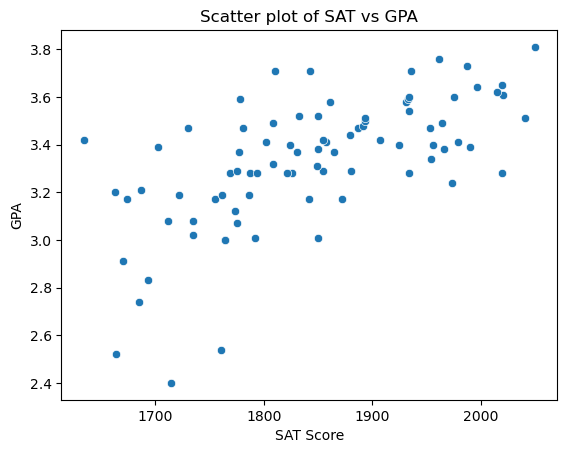

In [6]:
import seaborn as sns

sns.scatterplot(data=data, x='SAT', y='GPA')
plt.title("Scatter plot of SAT vs GPA")
plt.xlabel("SAT Score")
plt.ylabel("GPA")
plt.show()

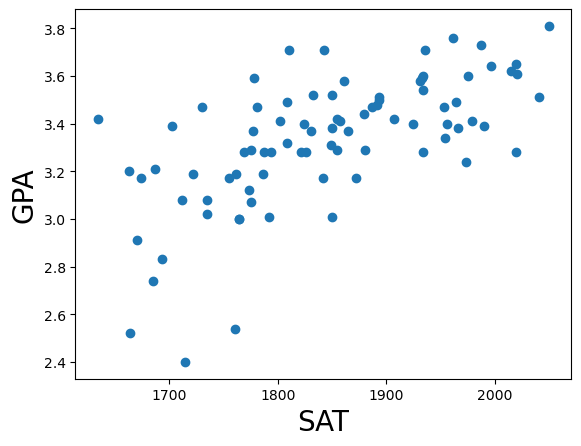

In [7]:
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

## Trying Regression

In [8]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
# Trying to get the equation in the form of y = a*x + b
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           7.20e-11
Time:                        00:57:39   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Square = 0.406  -> about 40.6% of the variance in GPA is explained by SAT score. Other factors may be : Study Hours, Attendance, IQ level or may be some are noise.

Adj. R-Squared = 0.399 -> Since its only one indepandent variable, its same mean as R Square

F-Statistic  -> Tests whether the overall model is significant. Higher is better

Prob (F-statistic) = 7.20e-11	Very small → model is highly significant overall.


SAT coefficient (0.0017): For each 1 point increase in SAT, GPA increases by 0.0017.

So, +100 SAT points ≈ +0.17 GPA.

p-value of SAT < 0.001: Statistically significant predictor of GPA.

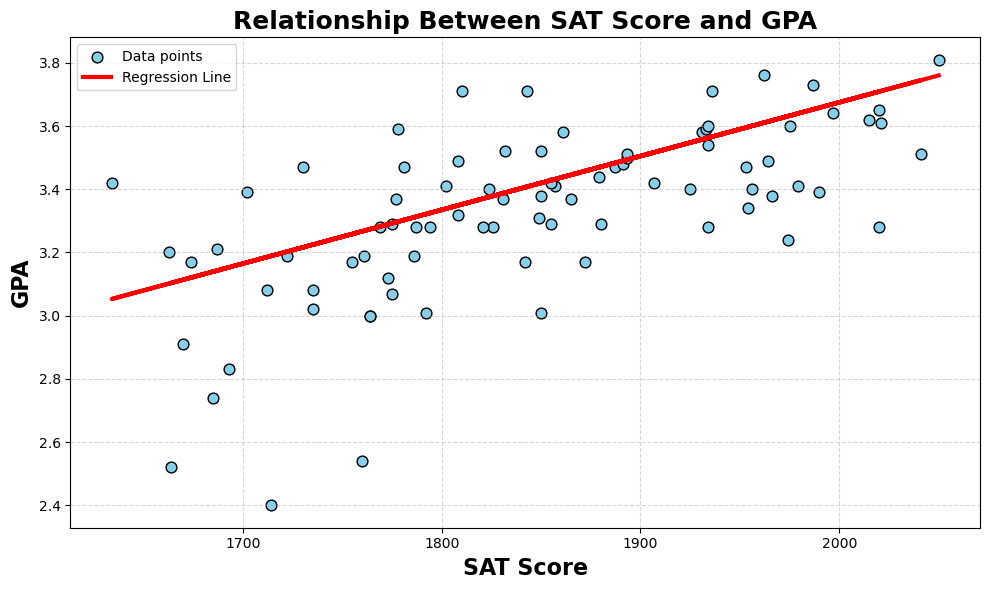

In [13]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x1, y, color='skyblue', edgecolor='k', s=60, label='Data points')

# Define regression line
yhat = 0.0017 * x1 + 0.275
plt.plot(x1, yhat, color='red', linewidth=3, label='Regression Line')

# Labeling
plt.xlabel('SAT Score', fontsize=16, fontweight='bold')
plt.ylabel('GPA', fontsize=16, fontweight='bold')
plt.title('Relationship Between SAT Score and GPA', fontsize=18, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
